# Time Series - Multiple Series example

###### Links: [Walmart dataset (Kaggle)](https://www.kaggle.com/c/m5-forecasting-uncertainty/overview)  |  [Article ()]()

### 0 - Setup

###### Import pckgs 

In [1]:
import warnings
warnings.filterwarnings("ignore")
from ts_utils import *
import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


###### Import data

In [2]:
dtf = pd.read_csv('data_multiple.csv')
dtf.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536_CA_1_validation,FOODS_3_536,FOODS_3,FOODS,CA_1,CA,3,2,2,4,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382_CA_3_validation,FOODS_3_382,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375_WI_1_validation,HOUSEHOLD_1_375,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,1,0,0,1,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084_CA_3_validation,FOODS_2_084,FOODS_2,FOODS,CA_3,CA,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668_CA_1_validation,FOODS_3_668,FOODS_3,FOODS,CA_1,CA,22,9,7,12,...,10,10,8,8,9,10,6,6,10,6


In [3]:
## Randomly reduce number of ts
dtf = dtf.drop_duplicates("item_id", keep='first').sample(1000).reset_index(drop=True)
dtf = dtf.drop(["id","dept_id","state_id","store_id"], axis=1)
dtf.head()

,item_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_183,HOBBIES,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,FOODS_1_057,FOODS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_356,HOBBIES,4,1,2,3,1,0,0,0,...,1,2,2,0,1,1,1,3,1,0
3,HOBBIES_2_022,HOBBIES,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
4,HOUSEHOLD_2_143,HOUSEHOLD,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,2,0


In [4]:
## Create dates list
cols = dtf.filter(like="d_", axis=1).columns.tolist()
dates = pd.date_range(start=(datetime.datetime.now() - datetime.timedelta(days=len(cols)-1)).strftime("%Y-%m-%d"),
                      end=datetime.datetime.now().strftime("%Y-%m-%d"), 
                      freq='D').astype(str).tolist()
print(dates[0:5], "...", dates[-1])

['2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08'] ... 2020-10-28


In [5]:
## Rename columns
dtf.columns = ["ts","exog"] + dates
dtf.head()

,ts,exog,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,...,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28
0,HOBBIES_1_183,HOBBIES,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,FOODS_1_057,FOODS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_356,HOBBIES,4,1,2,3,1,0,0,0,...,1,2,2,0,1,1,1,3,1,0
3,HOBBIES_2_022,HOBBIES,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
4,HOUSEHOLD_2_143,HOUSEHOLD,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,2,0


### 1 - Analysis

###### Resample

In [6]:
dtf, dates = resample_multiple_ts(dtf, dates, rule="M", agg="mean")
dtf.head()

--- columns from: 1915 --> to: 65 ---


,ts,exog,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,HOBBIES_1_183,HOBBIES,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.322581,0.517241,0.451613,0.366667,0.387097,0.600000,0.387097,0.419355,0.200000,0.357143
1,FOODS_1_057,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032258,0.000000,0.806452,0.666667,0.419355,0.800000,0.645161,0.161290,0.000000,0.000000
2,HOBBIES_1_356,HOBBIES,0.392857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.451613,1.068966,1.129032,1.633333,1.483871,1.866667,1.806452,1.548387,1.000000,1.000000
3,HOBBIES_2_022,HOBBIES,0.071429,0.133333,0.129032,0.133333,0.032258,0.096774,0.068966,0.096774,...,0.096774,0.103448,0.193548,0.233333,0.516129,0.200000,0.225806,0.258065,0.166667,0.178571
4,HOUSEHOLD_2_143,HOUSEHOLD,0.357143,0.433333,0.387097,0.200000,0.290323,0.161290,0.068966,0.000000,...,0.193548,0.413793,0.258065,0.200000,0.129032,0.066667,0.064516,0.322581,0.433333,0.214286


###### Visualization

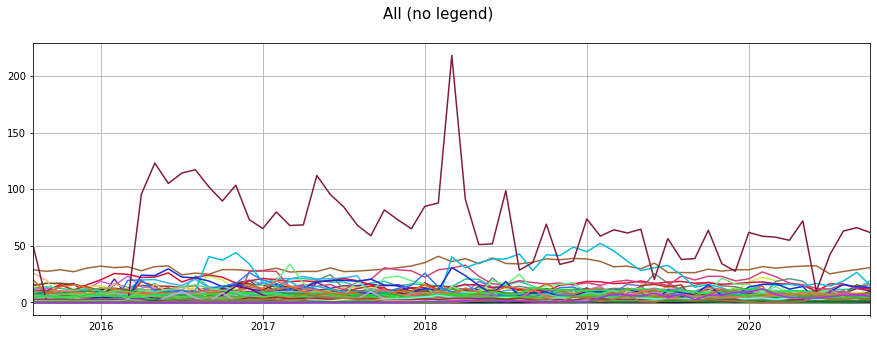

In [7]:
plot_multiple_ts(dtf, dates, color="ts", lst_colors=None, legend=False, title="All (no legend)", figsize=(15,5))

In [8]:
# -> Too many to spot a trend. let's try to color by exog:

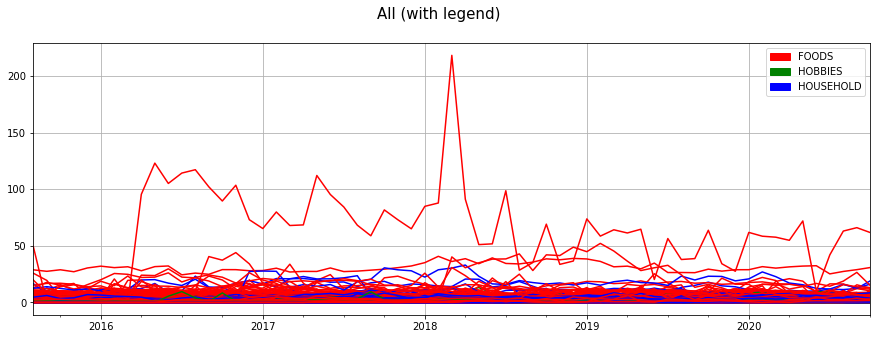

In [9]:
plot_multiple_ts(dtf, dates, color="exog", lst_colors=["red","green","blue"], legend=True, 
                 title="All (with legend)", figsize=(15,5))

In [10]:
# -> Same. Can the series be grouped by exog?

In [11]:
# Extract means
dtf_sum = summarize_multiple_ts(dtf, by="exog", aggs=["mean"], return_all=False)
dtf_sum

--- rows from: 1000 --> to: 3 ---


,ts,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,FOODS_mean,1.196125,1.056809,0.964379,0.915248,0.981537,0.974125,1.140499,1.101167,1.406809,...,1.749760,1.722817,1.666095,1.668582,1.637543,1.435106,1.653397,1.760535,1.795887,1.737006
1,HOBBIES_mean,0.322522,0.329932,0.324720,0.354932,0.320770,0.330810,0.311752,0.348914,0.321429,...,0.500165,0.507917,0.535550,0.559524,0.557768,0.564626,0.508723,0.498519,0.495748,0.515306
2,HOUSEHOLD_mean,0.471022,0.477645,0.464941,0.448403,0.485223,0.503573,0.467582,0.505409,0.553393,...,0.910180,0.928040,0.914429,0.887725,0.859281,0.836028,0.890574,0.926985,0.896208,0.951668


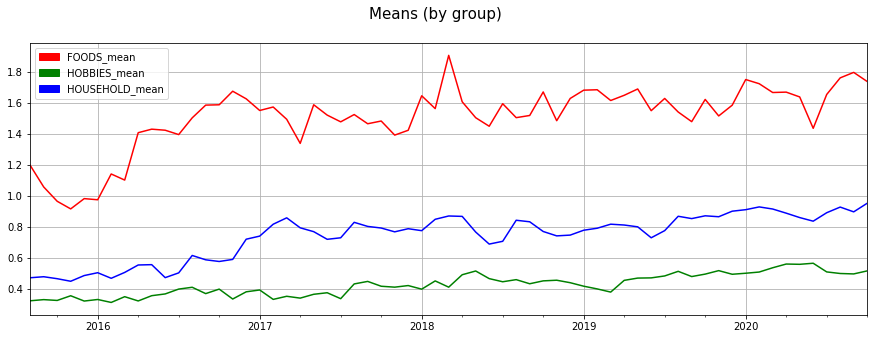

In [12]:
plot_multiple_ts(dtf_sum, dates, color="ts", lst_colors=["red","green","blue"], legend=True, 
                 title="Means (by group)", figsize=(15,5))

In [13]:
# -> It's more clear now, there is a visual pattern. But can those means be used as proxy for the series?

In [14]:
# Let's compare one mean with all the other series in the group (exog):
dtf_sum = summarize_multiple_ts(dtf[dtf["exog"]=="FOODS"], by=None, aggs=["mean"], return_all=True)
dtf_sum.tail()

--- rows from: 470 --> to: 471 ---


,ts,exog,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
466,FOODS_2_006,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032258,0.068966,0.096774,0.100000,0.000000,0.000000,0.096774,0.161290,0.166667,0.107143
467,FOODS_2_343,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.612903,1.689655,0.967742,1.466667,1.258065,1.500000,1.419355,1.516129,1.533333,1.857143
468,FOODS_3_801,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.774194,0.000000,0.387097,0.000000,1.000000,4.733333,2.483871,2.451613,3.600000,2.750000
469,FOODS_3_321,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.193548,12.000000,7.000000,4.266667,3.774194,3.866667,5.000000,6.419355,6.900000,5.428571
470,mean,NaN,1.196125,1.056809,0.964379,0.915248,0.981537,0.974125,1.140499,1.101167,...,1.749760,1.722817,1.666095,1.668582,1.637543,1.435106,1.653397,1.760535,1.795887,1.737006


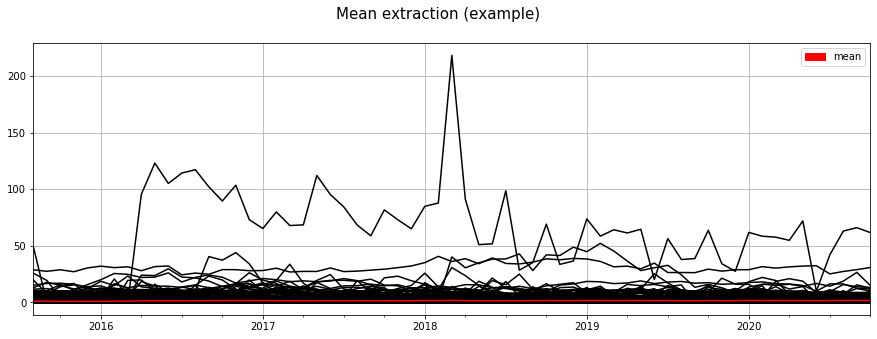

In [15]:
plot_multiple_ts(dtf_sum, dates, legend=True, lst_highlights=["mean"], 
                 title="Mean extraction (example)", figsize=(15,5))

In [16]:
# -> The mean is not representative of the group. So I'll find a new way of grouping the series with Clustering. 

### 3 - Clustering

###### Find Clusters

--- found 18 clusters ---


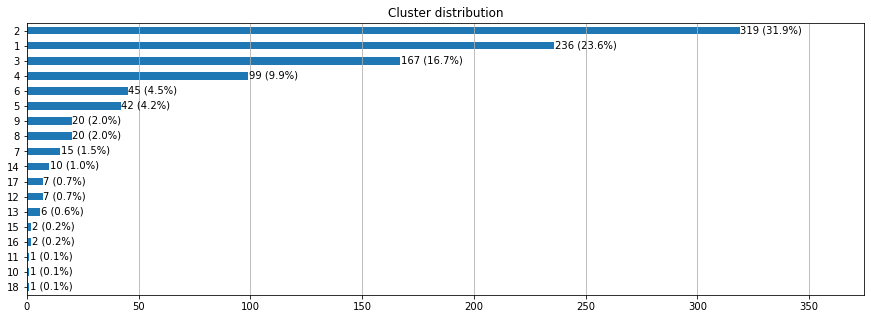

In [85]:
# Find clusters
dtf_c = clustering_multiple_ts(dtf, dates, figsize=(15,5))

In [67]:
dtf_c.head()

,ts,exog,cluster,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,HOBBIES_1_183,HOBBIES,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.322581,0.517241,0.451613,0.366667,0.387097,0.600000,0.387097,0.419355,0.200000,0.357143
1,FOODS_1_057,FOODS,17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.032258,0.000000,0.806452,0.666667,0.419355,0.800000,0.645161,0.161290,0.000000,0.000000
2,HOBBIES_1_356,HOBBIES,5,0.392857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.451613,1.068966,1.129032,1.633333,1.483871,1.866667,1.806452,1.548387,1.000000,1.000000
3,HOBBIES_2_022,HOBBIES,13,0.071429,0.133333,0.129032,0.133333,0.032258,0.096774,0.068966,...,0.096774,0.103448,0.193548,0.233333,0.516129,0.200000,0.225806,0.258065,0.166667,0.178571
4,HOUSEHOLD_2_143,HOUSEHOLD,3,0.357143,0.433333,0.387097,0.200000,0.290323,0.161290,0.068966,...,0.193548,0.413793,0.258065,0.200000,0.129032,0.066667,0.064516,0.322581,0.433333,0.214286


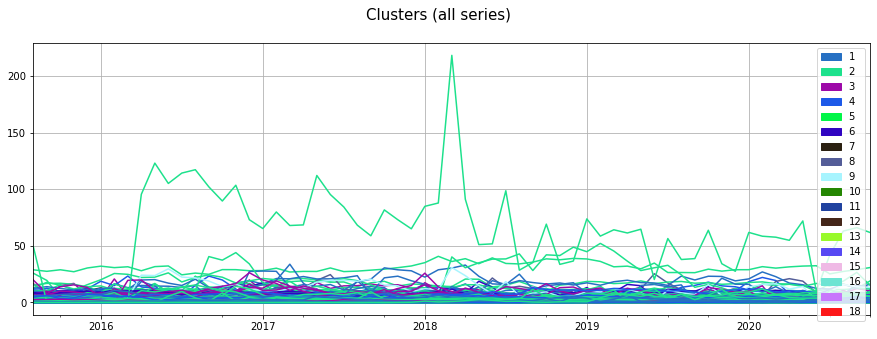

In [68]:
# Plot all clusters
plot_multiple_ts(dtf_c, dates, color="cluster", lst_colors=None, legend=True, 
                 title="Clusters (all series)", figsize=(15,5))

###### Check single cluster

In [74]:
c = 14

In [75]:
dtf_sum = summarize_multiple_ts(dtf_c[dtf_c["cluster"]==c], by=None, aggs=["mean"], return_all=True)
dtf_sum.tail()

--- rows from: 10 --> to: 11 ---


,ts,exog,cluster,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
6,HOBBIES_1_413,HOBBIES,14.0,0.000000,0.033333,0.032258,1.033333,0.903226,0.645161,0.620690,...,0.838710,0.448276,0.225806,0.366667,0.290323,0.200000,0.225806,0.516129,0.733333,0.892857
7,HOUSEHOLD_2_267,HOUSEHOLD,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.612903,0.689655,0.419355,0.266667,0.548387,0.533333,0.838710,0.516129,0.400000,0.464286
8,FOODS_1_194,FOODS,14.0,6.571429,5.500000,4.354839,4.533333,5.225806,3.838710,2.172414,...,1.838710,2.275862,2.096774,1.800000,1.741935,1.566667,1.645161,1.741935,2.766667,1.785714
9,FOODS_2_365,FOODS,14.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.064516,0.965517,1.612903,2.000000,0.064516,0.000000,0.774194,1.580645,1.033333,1.214286
10,mean,NaN,14.0,1.432143,1.200000,1.061290,1.156667,1.261290,1.129032,0.920690,...,1.032258,1.013793,1.074194,1.076667,0.970968,1.096667,1.280645,1.006452,0.980000,0.846429


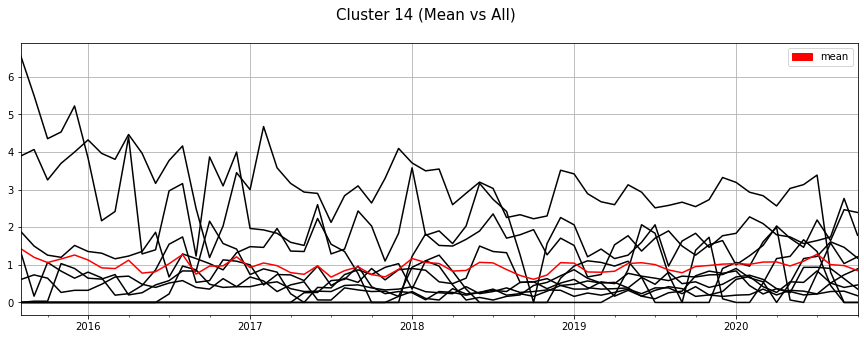

In [78]:
plot_multiple_ts(dtf_sum, dates, legend=True, lst_highlights=["mean"], 
                 title="Cluster "+str(c)+" (Mean vs All)", figsize=(15,5))

###### Get all means

In [72]:
# Get mean for each cluster
dtf_sum = summarize_multiple_ts(dtf_c, by="cluster", aggs=["mean"], return_all=False)
dtf_sum

--- rows from: 1000 --> to: 18 ---


,ts,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,1_mean,0.672821,0.666525,0.609486,0.636723,0.669081,0.667578,0.748539,0.724986,0.792797,...,1.034445,1.029515,1.016129,1.013277,1.023373,1.005508,1.050301,1.106616,1.057203,1.080660
1,2_mean,0.905956,0.721108,0.658712,0.627064,0.701183,0.729700,0.768349,0.780463,1.117764,...,1.397108,1.413793,1.397108,1.357262,1.371322,1.112435,1.328951,1.460411,1.516196,1.512203
2,3_mean,0.668092,0.617166,0.706973,0.623553,0.531582,0.475758,0.640512,0.642650,0.720160,...,0.982229,0.953954,0.843925,0.967864,0.990728,0.926148,1.018737,1.058528,1.041118,1.015398
3,4_mean,0.716450,0.880471,0.774194,0.741751,0.893776,1.069404,1.026820,1.061584,0.859259,...,1.560769,1.521073,1.511241,1.397980,1.253503,1.294613,1.359075,1.278267,1.289562,1.247114
4,5_mean,1.005102,1.033333,0.817972,0.748413,0.707373,0.619048,0.702791,0.602151,0.705556,...,1.188172,1.266831,1.267281,1.134127,0.976190,1.002381,1.079109,1.004608,1.178571,1.109694
5,6_mean,1.057143,1.234074,1.092473,1.103704,1.167742,1.042294,1.128736,1.152688,1.153333,...,1.344086,1.207663,1.182079,1.263704,1.094624,1.247407,1.157706,1.201434,1.205926,1.249206
6,7_mean,0.816667,0.624444,0.621505,0.788889,1.135484,1.268817,1.066667,0.756989,1.053333,...,0.853763,1.041379,0.913978,0.733333,0.784946,0.933333,1.027957,0.982796,0.862222,0.883333
7,8_mean,0.385714,0.155000,0.119355,0.076667,0.087097,0.082258,0.168966,0.256452,0.280000,...,0.862903,0.948276,1.520968,1.518333,1.351613,0.848333,0.864516,0.974194,1.166667,1.119643
8,9_mean,0.828571,0.448333,0.451613,0.456667,0.377419,0.304839,0.313793,0.559677,1.490000,...,1.929032,2.082759,2.022581,1.750000,1.672581,1.166667,1.714516,2.093548,1.735000,1.867857
9,10_mean,0.107143,0.233333,0.161290,0.133333,0.161290,0.032258,0.103448,0.064516,0.133333,...,0.000000,0.000000,0.064516,0.066667,0.032258,0.100000,0.000000,0.161290,0.000000,0.035714


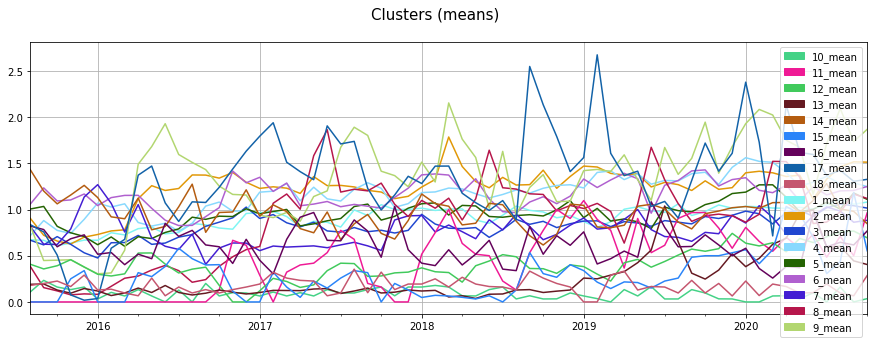

In [73]:
# Plot clusters
plot_multiple_ts(dtf_sum, dates, color="ts", lst_colors=None, legend=True, 
                 title="Clusters (means)", figsize=(15,5))

In [38]:
# -> I will work with the means series.

### 3 - Preprocessing

###### Partitioning

In [87]:
# By Columns
dtf_train, dtf_test = split_multiple_train_test(dtf_c, idxs=dates, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

--- splliting at 2019-10-31 (0.79) ---
train: (1000, 53) | test: (1000, 16)


In [88]:
dtf_test.head()

,ts,exog,cluster,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
0,HOUSEHOLD_2_440,HOUSEHOLD,95,0.548387,0.266667,0.000000,0.096774,1.068966,0.516129,1.400000,0.612903,1.033333,1.161290,1.096774,1.333333,0.851852
1,HOUSEHOLD_1_365,HOUSEHOLD,20,0.483871,0.700000,0.419355,0.709677,0.448276,0.677419,0.300000,0.419355,0.133333,0.258065,0.290323,0.500000,0.518519
2,FOODS_3_770,FOODS,68,0.709677,0.433333,1.258065,0.935484,0.758621,0.870968,0.500000,0.419355,0.700000,0.709677,0.806452,0.566667,0.444444
3,FOODS_3_169,FOODS,88,2.032258,1.733333,0.870968,1.290323,1.827586,1.096774,1.933333,1.870968,2.100000,1.806452,2.161290,1.833333,1.888889
4,HOUSEHOLD_1_418,HOUSEHOLD,34,17.935484,16.400000,13.612903,13.516129,15.275862,23.032258,14.900000,9.935484,14.766667,13.903226,20.483871,15.733333,20.185185


In [89]:
# By Rows
dtf_train, dtf_test = split_multiple_train_test(dtf_c, idxs=None, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

train: (800, 66) | test: (200, 66)


In [90]:
dtf_test.head()

,ts,exog,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,...,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,cluster
464,HOUSEHOLD_2_173,HOUSEHOLD,0.000000,0.000000,0.161290,0.333333,0.258065,0.290323,0.068966,0.161290,...,0.275862,0.000000,0.000000,0.000000,0.133333,0.129032,0.258065,0.133333,0.222222,124
530,HOUSEHOLD_1_181,HOUSEHOLD,0.586207,0.633333,0.612903,0.533333,0.548387,0.290323,0.241379,0.548387,...,0.344828,0.258065,0.366667,0.451613,0.300000,0.322581,0.322581,0.333333,0.370370,48
286,FOODS_3_042,FOODS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.193548,...,3.068966,2.806452,2.466667,1.903226,2.300000,2.354839,2.516129,2.166667,2.962963,124
78,FOODS_3_555,FOODS,29.034483,27.100000,28.903226,27.066667,30.322581,32.483871,30.965517,31.032258,...,31.931034,30.806452,30.866667,32.258065,32.566667,24.838710,28.032258,28.433333,31.111111,121
929,HOUSEHOLD_2_433,HOUSEHOLD,0.137931,0.233333,0.161290,0.100000,0.096774,0.000000,0.000000,0.225806,...,0.000000,0.000000,0.133333,0.193548,0.233333,0.161290,0.193548,0.133333,0.111111,102


### 4 - Forecasting